# WeatherPy
----

##Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

###Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg.  Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="hsv")
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import requests, datetime
import time
import json
import pip
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Capitalize the city names
cities = [c.title() for c in cities]
    
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24f6bced2eab9b53e610ea5ef0f8c974


In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [7]:
# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, set numbers, and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   # Run an API request for each of the cities.
    try:
        
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | conakry
Processing Record 2 of Set 13 | poum
Processing Record 3 of Set 13 | avarua
Processing Record 4 of Set 13 | tiksi
Processing Record 5 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 13 | qaanaaq
Processing Record 7 of Set 13 | bathsheba
Processing Record 8 of Set 13 | kodiak
Processing Record 9 of Set 13 | atuona
Processing Record 10 of Set 13 | talnakh
Processing Record 11 of Set 13 | new norfolk
Processing Record 12 of Set 13 | saint anthony
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | bluff
Processing Record 15 of Set 13 | husavik
Processing Record 16 of Set 13 | vaini
Processing Record 17 of Set 13 | mataura
Processing Record 18 of Set 13 | rikitea
Processing Record 19 of Set 13 | lumeje
Processing Record 20 of Set 13 | chokwe
Processing Record 21 of Set 13 | naze
Processing Record 22 of Set 13 | albany
Processing Record 23 of Set 13 | provideniya
Processing Record 24 of Set 13 |

Processing Record 33 of Set 16 | sao joaquim
Processing Record 34 of Set 16 | aksarka
Processing Record 35 of Set 16 | saldanha
Processing Record 36 of Set 16 | estelle
Processing Record 37 of Set 16 | faanui
Processing Record 38 of Set 16 | leningradskiy
Processing Record 39 of Set 16 | port elizabeth
Processing Record 40 of Set 16 | hokitika
Processing Record 41 of Set 16 | yangjiang
Processing Record 42 of Set 16 | alushta
Processing Record 43 of Set 16 | ilulissat
Processing Record 44 of Set 16 | alagoa grande
Processing Record 45 of Set 16 | hilo
Processing Record 46 of Set 16 | saint-pierre
Processing Record 47 of Set 16 | lensk
Processing Record 48 of Set 16 | anito
Processing Record 49 of Set 16 | prado
Processing Record 50 of Set 16 | satuk
Processing Record 1 of Set 17 | clyde river
Processing Record 2 of Set 17 | mangan
Processing Record 3 of Set 17 | ternate
Processing Record 4 of Set 17 | haibowan
City not found. Skipping...
Processing Record 5 of Set 17 | dangtu
Processin

Processing Record 20 of Set 20 | griffith
Processing Record 21 of Set 20 | kapit
Processing Record 22 of Set 20 | aklavik
Processing Record 23 of Set 20 | bengkulu
Processing Record 24 of Set 20 | port macquarie
Processing Record 25 of Set 20 | severo-kurilsk
Processing Record 26 of Set 20 | thurso
Processing Record 27 of Set 20 | yatou
Processing Record 28 of Set 20 | rawson
Processing Record 29 of Set 20 | olafsvik
Processing Record 30 of Set 20 | pedernales
Processing Record 31 of Set 20 | grand gaube
Processing Record 32 of Set 20 | tazmalt
Processing Record 33 of Set 20 | sambava
Processing Record 34 of Set 20 | adwa
Processing Record 35 of Set 20 | jumla
Processing Record 36 of Set 20 | talcahuano
Processing Record 37 of Set 20 | pitkyaranta
Processing Record 38 of Set 20 | bandarbeyla
Processing Record 39 of Set 20 | salalah
Processing Record 40 of Set 20 | dhidhdhoo
Processing Record 41 of Set 20 | lardos
Processing Record 42 of Set 20 | chulym
Processing Record 43 of Set 20 | 

Processing Record 4 of Set 24 | omsukchan
Processing Record 5 of Set 24 | svetlaya
Processing Record 6 of Set 24 | behshahr
Processing Record 7 of Set 24 | ostrovskoye
Processing Record 8 of Set 24 | ahipara
Processing Record 9 of Set 24 | erenhot
Processing Record 10 of Set 24 | pemba
Processing Record 11 of Set 24 | ventersburg
Processing Record 12 of Set 24 | salinas
Processing Record 13 of Set 24 | doctor pedro p. pena
City not found. Skipping...
Processing Record 14 of Set 24 | crotone
Processing Record 15 of Set 24 | reyes
Processing Record 16 of Set 24 | cockburn town
Processing Record 17 of Set 24 | ulaanbaatar
Processing Record 18 of Set 24 | turtas
Processing Record 19 of Set 24 | toliary
City not found. Skipping...
Processing Record 20 of Set 24 | mirador
Processing Record 21 of Set 24 | piedras negras
Processing Record 22 of Set 24 | juneau
Processing Record 23 of Set 24 | fethiye
Processing Record 24 of Set 24 | ostrovnoy
Processing Record 25 of Set 24 | rosita
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conakry,9.54,-13.68,80.83,74,37,3.58,GN,2020-04-21 01:21:38
1,Poum,-20.23,164.02,78.28,76,2,15.95,NC,2020-04-21 01:21:38
2,Avarua,-21.21,-159.78,82.40,74,1,17.22,CK,2020-04-21 01:21:38
3,Tiksi,71.69,128.87,23.11,95,95,3.00,RU,2020-04-21 01:21:39
4,Qaanaaq,77.48,-69.36,6.60,82,12,5.44,GL,2020-04-21 01:21:39
5,Bathsheba,13.22,-59.52,77.00,83,75,17.22,BB,2020-04-21 01:21:39
6,Kodiak,57.79,-152.41,44.60,87,90,10.29,US,2020-04-21 01:21:39
7,Atuona,-9.80,-139.03,82.76,72,3,11.07,PF,2020-04-21 01:21:39
8,Talnakh,69.49,88.40,32.00,94,75,22.37,RU,2020-04-21 01:21:40
9,New Norfolk,-42.78,147.06,59.00,51,20,12.75,AU,2020-04-21 01:21:40


In [9]:
city_data_new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Conakry,GN,2020-04-21 01:21:38,9.54,-13.68,80.83,74,37,3.58
1,Poum,NC,2020-04-21 01:21:38,-20.23,164.02,78.28,76,2,15.95
2,Avarua,CK,2020-04-21 01:21:38,-21.21,-159.78,82.40,74,1,17.22
3,Tiksi,RU,2020-04-21 01:21:39,71.69,128.87,23.11,95,95,3.00
4,Qaanaaq,GL,2020-04-21 01:21:39,77.48,-69.36,6.60,82,12,5.44
5,Bathsheba,BB,2020-04-21 01:21:39,13.22,-59.52,77.00,83,75,17.22
6,Kodiak,US,2020-04-21 01:21:39,57.79,-152.41,44.60,87,90,10.29
7,Atuona,PF,2020-04-21 01:21:39,-9.80,-139.03,82.76,72,3,11.07
8,Talnakh,RU,2020-04-21 01:21:40,69.49,88.40,32.00,94,75,22.37
9,New Norfolk,AU,2020-04-21 01:21:40,-42.78,147.06,59.00,51,20,12.75


In [28]:
# Save dataframe to csv file
city_data_df.to_csv("CityData.csv")

#Display the dataframe
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Conakry,GN,2020-04-21 01:21:38,9.54,-13.68,80.83,74,37,3.58
1,Poum,NC,2020-04-21 01:21:38,-20.23,164.02,78.28,76,2,15.95
2,Avarua,CK,2020-04-21 01:21:38,-21.21,-159.78,82.40,74,1,17.22
3,Tiksi,RU,2020-04-21 01:21:39,71.69,128.87,23.11,95,95,3.00
4,Qaanaaq,GL,2020-04-21 01:21:39,77.48,-69.36,6.60,82,12,5.44


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# no cities have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

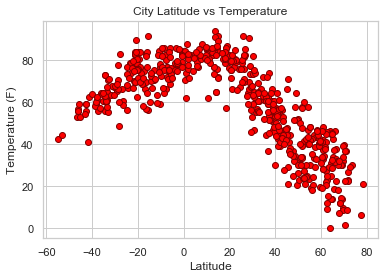

In [12]:
# Generate scatter plot for Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolors='red', edgecolors = 'maroon')
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

In [13]:
# Save the figure
plt.savefig("City_Latitude_vs_Temperature.png", dpi= 150)
plt.show()

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

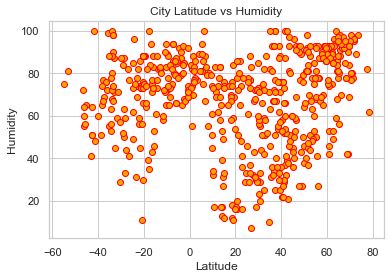

In [14]:
# Generate scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", facecolors='orange', edgecolors = 'red')
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

In [15]:
# Save the figure
plt.savefig("City_Latitude_vs_Humidity.png", dpi= 150)
plt.show()

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

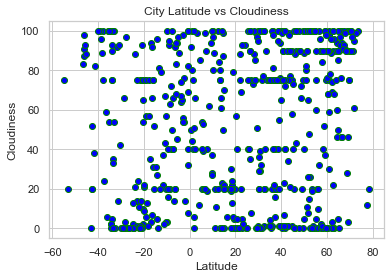

In [29]:
# Generate scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", facecolors='blue', edgecolors = 'green')
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

In [17]:
# Save the figure
plt.savefig("City_Latitude_vs_Cloudiness.png", dpi= 150)
plt.show()

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

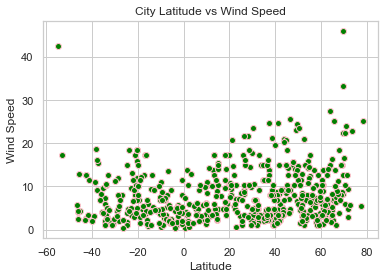

In [31]:
# Generate scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolors='green', edgecolors = 'pink')
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

In [19]:
# Save the figure
plt.savefig("City_Latitude_vs_Wind_Speed.png", dpi= 150)
plt.show()

<Figure size 432x288 with 0 Axes>

## Linear Regression

####Norther Hemisphere - Max Temp vs. Latitude Linear Regression

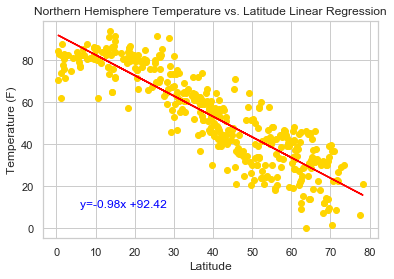

In [20]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_hemisphere = city_data_df.loc[city_data_df["Lat"]>=0]
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere Temperature vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

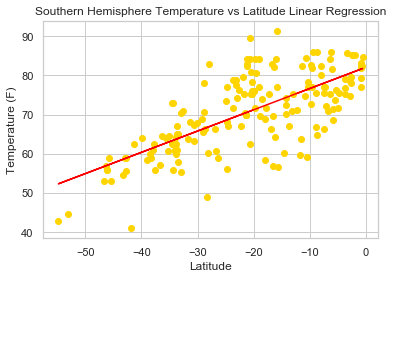

In [21]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_hemisphere = city_data_df.loc[city_data_df["Lat"]<0]
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-17,10), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere Temperature vs Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

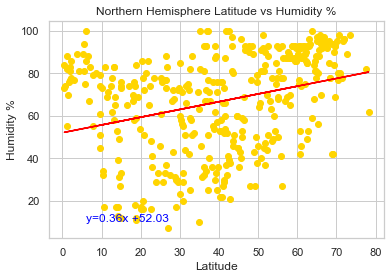

In [22]:
# Northern Hemisphere - Humidity % vs. Latitude Linear Regression
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Latitude vs Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

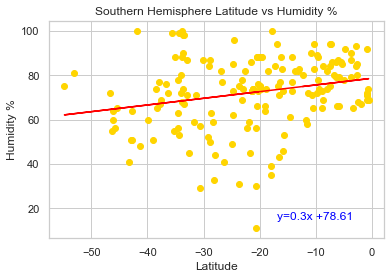

In [23]:
# Southern Hemisphere - Humidity % vs. Latitude Linear Regression
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-17,15), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Latitude vs Humidity %')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

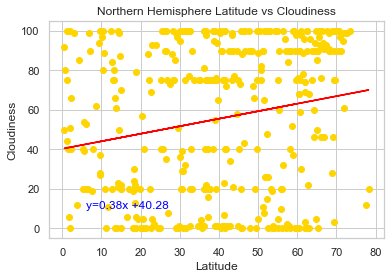

In [24]:
# Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

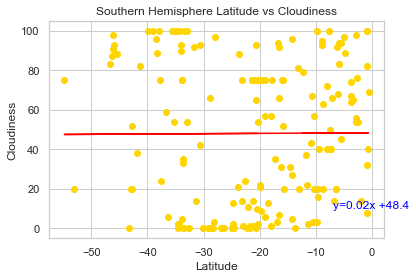

In [25]:
# Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-7,10), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

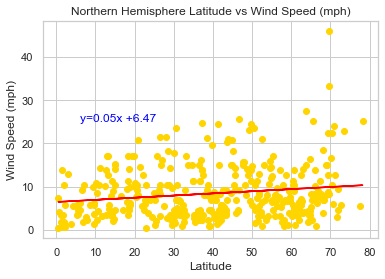

In [26]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,25), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

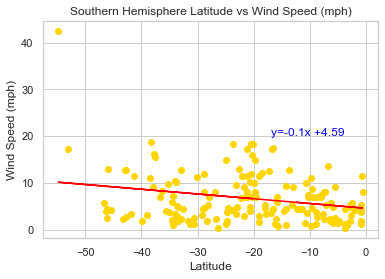

In [32]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-17,20), fontsize = 12, color ='blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs Wind Speed (mph)')
plt.show()